In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Overview
Current status of each account and the summarized count of each account status

In [2]:
ast = pd.read_csv("../Resources/account_state_transitions.csv")
ast = ast.iloc[:,2:6]

In [3]:
# Sort by account_id and date
ast = ast.sort_values(['account_id','started_when'])

# Reset index
ast = ast.reset_index(drop=True)

In [4]:
# Group by account_id, find most recent date and corresponding state
ast_grouped = ast.groupby('account_id',as_index=False).agg({
    'started_when':'max',
    'to_state':'last'
})

In [5]:
# Current state of each account_id
ast_grouped.head()

,account_id,started_when,to_state
0,1,2020-01-17 13:01:20.571392,DISABLED
1,2,2020-02-24 02:00:21.571392,UNLOCKED
2,3,2020-03-17 22:22:55.571392,DISABLED
3,4,2020-02-25 04:28:59.571392,UNLOCKED
4,5,2020-03-12 01:00:17.571392,DISABLED


In [6]:
# Number of accounts in each state
account_overview = ast_grouped['to_state'].value_counts()
account_overview_df = pd.DataFrame(account_overview).reset_index()

In [7]:
# Rename column
account_overview_df = account_overview_df.rename(columns={'index':'status','to_state':'number_of_accounts'})

# Reassign value
account_overview_df.iloc[0,0] = 'ONGOING'
account_overview_df

,status,number_of_accounts
0,ONGOING,473
1,UNLOCKED,292
2,WRITTEN_OFF,7


### Visualize

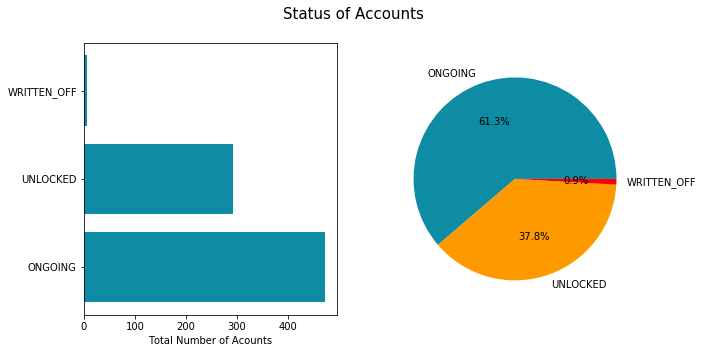

In [8]:
# Set values
y = account_overview_df['status']
width = account_overview_df['number_of_accounts']
colors = ['#0e8ca4', '#ff9900', 'red']

# Format subplots
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Create first plot
fig.suptitle("Status of Accounts",fontsize=15)
ax1.barh(y,width, color="#0e8ca4")
ax1.set_xlabel("Total Number of Acounts")

# Create second plot
ax2.pie(width,labels=y,colors=colors,autopct='%1.1f%%')

# Save figure
plt.savefig('../Output/Part2/account_overview.png')

# Show figure
plt.show()